# Day 1 - Data foundations practical tasks
***

These tasks cover data preparation, visualization and feature engineering topics.

## Explore the datasets and answer the questions below.
#### Here are some guidlines and advices you should consider:
* you can add as many cells as is comfortable for you for each answer
* some questions require your explanation. Add a cell and choose a markdown option in the menu 
* when you are making plots, please add labels to the axes

For this task you will use red wine dataset

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
wine_data = pd.read_csv('winequality-red.csv', sep = ';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
wine_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [3]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
wine_data.isnull().values.sum()

np.int64(0)

### 1. `quality` attribute in the DataFrame has a score from 0 to 10. How many observations (rows) belong to each score level? 

In [167]:
wine_data.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

### 2. Make a bar plot, where we can see distribution of the samples against quality attributes.

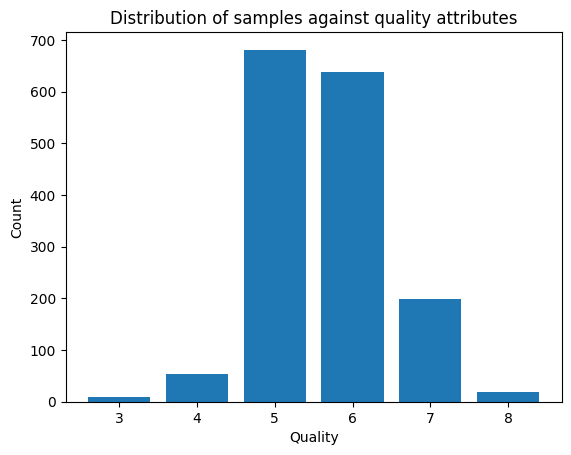

In [175]:
plt.bar(wine_data['quality'].unique(), wine_data['quality'].value_counts())
plt.title('Distribution of samples against quality attributes')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### 3. What is the average value of each feature (column) in each `quality` score level? 

In [169]:
wine_data.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


### 4. What is the median value of each feature (column) in each `quality` score level? 

In [170]:
wine_data.groupby('quality').median()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.50,0.845,0.035,2.1,0.0905,6.0,15.0,0.997565,3.39,0.545,9.925
4,7.50,0.670,0.090,2.1,0.0800,11.0,26.0,0.996500,3.37,0.560,10.000
5,7.80,0.580,0.230,2.2,0.0810,15.0,47.0,0.997000,3.30,0.580,9.700
6,7.90,0.490,0.260,2.2,0.0780,14.0,35.0,0.996560,3.32,0.640,10.500
7,8.80,0.370,0.400,2.3,0.0730,11.0,27.0,0.995770,3.28,0.740,11.500
8,8.25,0.370,0.420,2.1,0.0705,7.5,21.5,0.994940,3.23,0.740,12.150


### 5. We can notice that for some features raw values differ significantly. Scale the data (except quality column) using Min-Max Scaling manually (create formula yourself). Then use built-in Min-Max Scaling function to validate results (display the resulting data frames separately).
#### Hint: you can use `pd.DataFrame(<your data>)` to display the result of the built-in function in a nicer way.

In [171]:
X = pd.DataFrame(wine_data.drop(columns='quality'))

X_min = X.min()
X_max = X.max()

data_scaled_manual = (X - X_min) / (X_max - X_min)
data_scaled_manual.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


In [172]:
scaler = MinMaxScaler()

data_scaled = pd.DataFrame(scaler.fit_transform(data_scl))
data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


### 6. Create correlation matrix between all variables.

In [173]:
corr = wine_data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


### 7. Plot heatmap to see correlations.

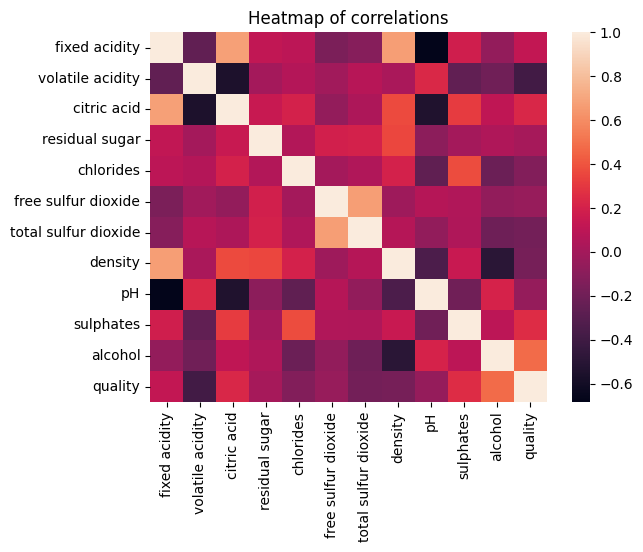

In [174]:
sns.heatmap(corr)
plt.title('Heatmap of correlations')
plt.show()

### 8. Identify the first and last 10% of data outliers in `alcohol`

In [176]:
alcohol = wine_data['alcohol']

lower_threshold = alcohol.quantile(0.1)
lower_outliers = pd.DataFrame(alcohol[alcohol < lower_threshold])

higher_threshold = alcohol.quantile(0.9)
higher_outliers = pd.DataFrame(alcohol[alcohol > higher_threshold])

print(lower_outliers, higher_outliers)

      alcohol
10       9.20
13       9.10
14       9.20
15       9.20
18       9.00
...       ...
1515     9.25
1521     9.05
1533     9.00
1568     9.20
1589     9.20

[135 rows x 1 columns]       alcohol
45       13.1
95       12.9
131      13.0
132      13.0
142      14.0
...       ...
1490     12.4
1547     12.1
1570     12.4
1573     12.5
1588     12.8

[141 rows x 1 columns]


### 9. Plot boxplots for all columns (except quality), use figure size 15x6. You can use both original and scaled data for this task. Try to interpret the data for one feature of your choice and write your observations.

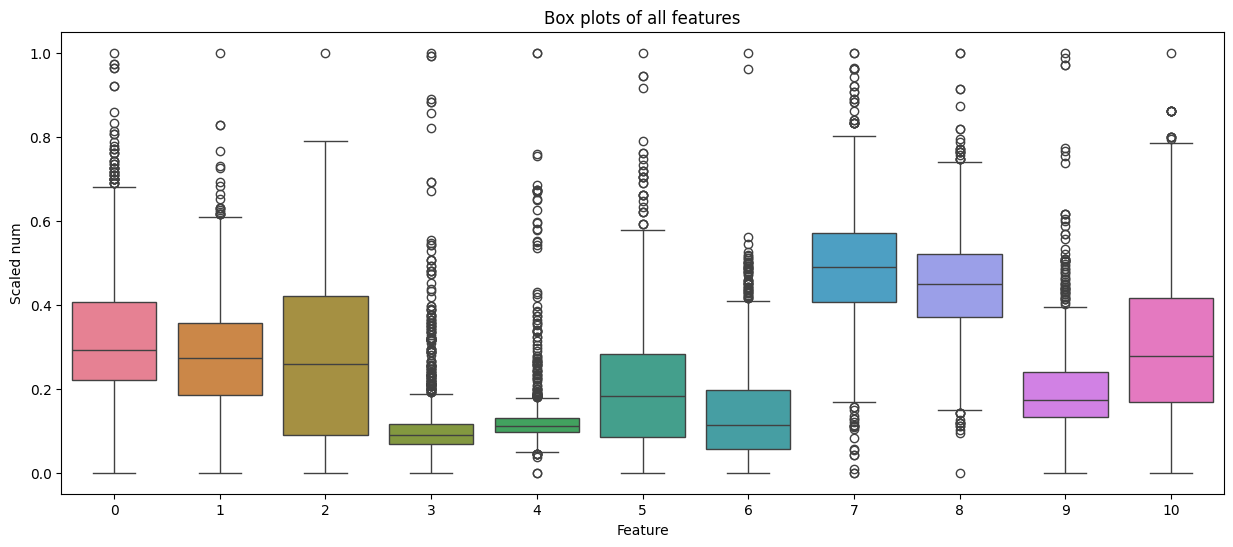

array([15.,  6.])

In [179]:
features = [col for col in data_scaled] # data_scaled is without quality col

plt.figure(figsize=(15, 6))
sns.boxplot(data=data_scaled[features])
plt.title("Box plots of all features")
plt.xlabel('Feature')
plt.ylabel('Scaled num')

plt.show()
fig.get_size_inches()

# chloride values (4) are very close to each other, while citric acid (2) has a wide range of values, and (2) has almost no outliers

### 10. Plot boxplot of Ph for each quality type.

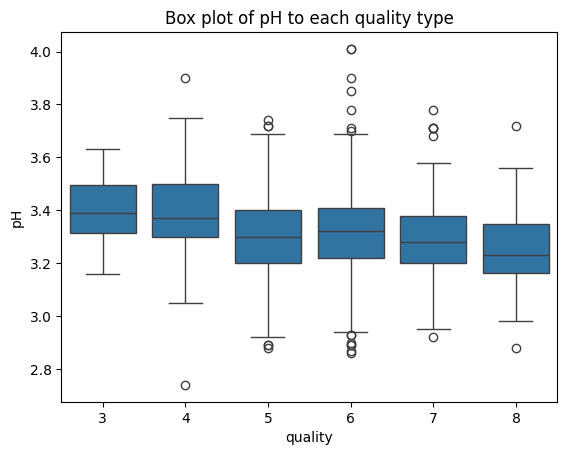

In [180]:
sns.boxplot(x='quality', y='pH', data=wine_data)
plt.title('Box plot of pH to each quality type')

plt.show()

### 11. Plot scatter plot for `quality` and column with strongest correlation to it. Does alcohol influence the quality of the wine?

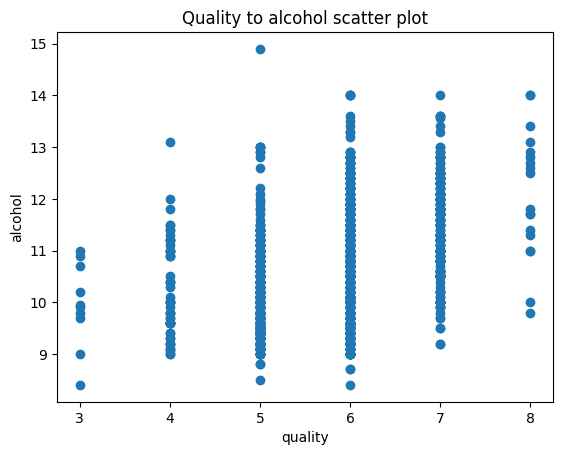

In [181]:
plt.scatter(wine_data['quality'], wine_data['alcohol'])
plt.title('Quality to alcohol scatter plot')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

# wine quality gets slightly higher the more alcohol it has

### 12. Plot scatter plot for any two columns and color it by `quality` number. Add color legend and write your observations.

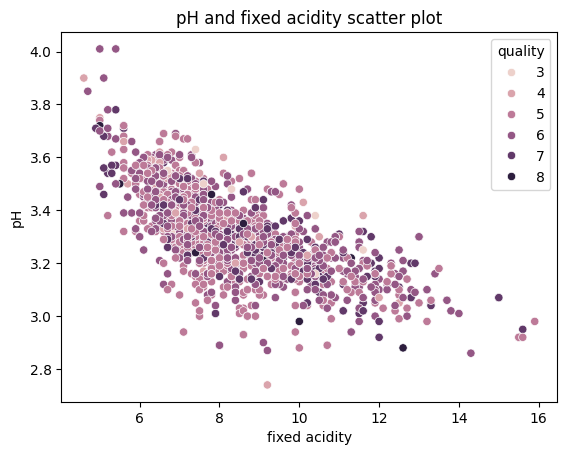

In [182]:
sns.scatterplot(data=wine_data, x="fixed acidity", y="pH", hue="quality")
plt.title('pH and fixed acidity scatter plot')
plt.show()

# fixed acidity gets higher as pH decreases

### 13. Create X, y for independent variables (all except `quality`) and target variable `quality`, perform k-fold k=3 split on them and calculate and print out the length of training set and testing set for each fold

In [183]:
X = wine_data.drop(columns="quality")
y = wine_data['quality']

k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [184]:
fold = 1
for train_index, test_index in kf.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Fold {fold}:")
    print(f"X_train:\n{X_train}")
    print(f"y_train:\n{y_train}")
    print(f"X_test:\n{X_test}")
    print(f"y_test:\n{y_test}")
    print()
    fold += 1

Fold 1:
X_train:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1593            6.8              0.62         0.08             1.9      0.068   
1594            6.2              0.60         0.08             2.0      0.090   
1595            5.9              0.55         0.10             2.2      0.062   
1596            6.3              0.51         0.13             2.3      0.076   
1598            6.0              0.31         0.47             3.6      0.067   

      free

### 14. Create two new features:
- Sulfur dioxide ration (`free sulfur dioxide` / `total sulfur dioxide`)
- Total acidity (`fixed acidity` + `volatile acidity` + `citric acid`)

In [185]:
wine_data['Sulfur dioxide ration'] = wine_data['free sulfur dioxide'] / wine_data['total sulfur dioxide']
wine_data['Total acidity'] = wine_data['fixed acidity'] + wine_data['volatile acidity'] + wine_data['citric acid']

wine_data['Sulfur dioxide ration'], wine_data['Total acidity']

(0       0.323529
 1       0.373134
 2       0.277778
 3       0.283333
 4       0.323529
           ...   
 1594    0.727273
 1595    0.764706
 1596    0.725000
 1597    0.727273
 1598    0.428571
 Name: Sulfur dioxide ration, Length: 1599, dtype: float64,
 0        8.100
 1        8.680
 2        8.600
 3       12.040
 4        8.100
          ...  
 1594     6.880
 1595     6.550
 1596     6.940
 1597     6.665
 1598     6.780
 Name: Total acidity, Length: 1599, dtype: float64)

### 15. Create a sample dataset with dates for a whole week. Extract day of the week with `dayofweek` function (0=Monday, 6=Sunday). Additionally flag weekends by creating another new `is_weekend` feature.

In [203]:
df = pd.DataFrame({
  'date' : ['2026-02-09', '2026-02-10', '2026-02-11', '2026-02-12', '2026-02-13', '2026-02-14', '2026-02-15']
})
df['date'] = pd.to_datetime(df['date'])

df['day_of_week'] = df['date'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x > 4 else 0)

df

,date,day_of_week,is_weekend
0,2026-02-09,0,0
1,2026-02-10,1,0
2,2026-02-11,2,0
3,2026-02-12,3,0
4,2026-02-13,4,0
5,2026-02-14,5,1
6,2026-02-15,6,1
